In [85]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import os

import json
with open("students_details.json") as f:
    data = json.load(f)

all_rolls = list(i.lower() for i in data.keys())

print(all_rolls)

['2021107', '2021162', '2021197', '2021200', '2022228', '2022241', '2021528', '2022463', 'mt24018', 'mt24099', 'mt24029', 'mt24063', '2022490', '2022562', '2019457', '2022387', '2021457', '2022416', '2022473', 'mt24219', '2022514', 'mt24042', '2022461', '2021114', '2022225', '2022284', 'mt24133', '2022113', 'mt24002', 'mt24136', '2021019', '2021211', '2022395', '2021533', '2021545', '2022541', 'mt23010', 'phd23011', 'phd23012', 'phd24105', '2022170', '2022399', 'mt24100', '2021540', '2021563', '2022077', '2022079', '2022392', '2022506', 'mt24012', 'mt24066', 'phd24001', '2021111', '2022586', '2022249', 'mt24142', '2020541', '2021218', '2021521', '2021562', '2022103', '2022159', '2022273', '2022294', '2022338', '2022434', '2022482', '2022529', '2022544', '2022569', '2022606', 'mt23019', 'mt24024', 'mt24033', 'mt24064', 'mt24127', '2021526', '2021550', '2021555', '2022431', '2022522', 'mt23125', '2022074', 'mt24001', 'mt24108', '2021036', '2021532', '2021573', '2022019', '2022097', '2022

In [93]:
def get_metrics(gt, pred, thresh=1.0, all_rolls=None):
    # Load CSVs
    gt_df = pd.read_csv(gt, header=0)
    pred_df = pd.read_csv(pred, header=0)
    orig_df = len(pred_df)
    # Ground truth rolls
    gt_set = set(i.lower() for i in gt_df["Roll"].astype(str))

    # Filter predictions using the threshold
    # print(sum(pred_df["Score"] < thresh))
    pred_df = pred_df[pred_df["Score"] < thresh]
    pred_set = set(i.lower() for i in pred_df["Roll"].astype(str))

    # print(f"{len(pred_set)}/{orig_df}")
    # Union of all roll numbers
    all_rolls = sorted(all_rolls)

    # Labels
    y_true = [1 if roll in gt_set else 0 for roll in all_rolls]
    y_pred = [1 if roll in pred_set else 0 for roll in all_rolls]

    # Metrics
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return {"cm" : cm,
    "accuracy" : accuracy,
    "precision" : precision,
    "recall" : recall,
    "f1" : f1
    }


def get_avg_scores(scores):
    # Calculate averages for each metric
    average_scores = {
        "accuracy": sum(score["accuracy"] for score in scores) / len(scores),
        "precision": sum(score["precision"] for score in scores) / len(scores),
        "recall": sum(score["recall"] for score in scores) / len(scores),
        "f1": sum(score["f1"] for score in scores) / len(scores)
    }

    # Display the final result
    print("Final Average Scores:")
    for metric, value in average_scores.items():
        print(f"{metric.capitalize()}: {value:.3f}")

In [94]:
# # # gt = 'attendance_data/gt_18_Feb.csv'
# # # pred = 'attendance_data/attendance_18_Feb.csv'
# # gt = 'attendance_data/test_gt_18_Feb.csv'
# # pred = 'attendance_data/test_attendance_18_Feb.csv'
# # get_metrics(gt, pred)
# folder_path = 'attendance_data'
# all_files = os.listdir(folder_path)
# all_files = [os.path.join(folder_path, f) for f in all_files]
# gt_files = [f for f in all_files if os.path.basename(f).startswith('gt_')]
# attendance_files = [f for f in all_files if os.path.basename(f).startswith('attendance_')]

# def extract_date_key(filename):
#     return filename.split('_')[-2].lower() + "_" + filename.split('_')[-1].lower().replace('.csv', '')

# gt_dict = {extract_date_key(f): f for f in gt_files}
# attendance_dict = {extract_date_key(f): f for f in attendance_files}

# # Get pairs
# common_keys = sorted(set(gt_dict.keys()) & set(attendance_dict.keys()))
# pairs = [(gt_dict[k], attendance_dict[k]) for k in common_keys]

# scores = []
# for gt_file, att_file in pairs:
#     print(f"GT: {gt_file}  <->  Attendance: {att_file}")
#     df = get_metrics(gt_file, att_file)
#     scores.append(df)

# # Calculate averages for each metric
# average_scores = {
#     "accuracy": sum(score["accuracy"] for score in scores) / len(scores),
#     "precision": sum(score["precision"] for score in scores) / len(scores),
#     "recall": sum(score["recall"] for score in scores) / len(scores),
#     "f1": sum(score["f1"] for score in scores) / len(scores)
# }

# # Display the final result
# print("Final Average Scores:")
# for metric, value in average_scores.items():
#     print(f"{metric.capitalize()}: {value:.3f}")

In [95]:
import os
from glob import glob

In [96]:
#goal - to find accuracy for both the algo, greedy filter and simple filter
csv_folder = "../attendance_by_date"

pairs = []
for date in os.listdir(csv_folder):
    # print(date)
    date_path = os.path.join(csv_folder, date)
    try:
        pred = glob(f"{date_path}/*greedy*")[0]
        gt = glob(f"{date_path}/gt*")[0]
    except:
        print(f"Missing file in: {date}")
        continue
    # print(pred, gt)
    pairs.append([gt, pred])
# print(pairs)

scores = []
for gt_file, att_file in pairs:
    # print(f"GT: {gt_file}  <->  Attendance: {att_file}")
    df = get_metrics(gt_file, att_file, thresh=0.3, all_rolls=all_rolls)
    scores.append(df)
    print(df)

get_avg_scores(scores)

Missing file in: 07_Jan
Missing file in: 16_Jan
Missing file in: 20_Feb
{'cm': array([[27,  5],
       [18, 46]], dtype=int64), 'accuracy': 0.7604166666666666, 'precision': 0.9019607843137255, 'recall': 0.71875, 'f1': 0.8}
{'cm': array([[29,  4],
       [14, 49]], dtype=int64), 'accuracy': 0.8125, 'precision': 0.9245283018867925, 'recall': 0.7777777777777778, 'f1': 0.8448275862068966}
{'cm': array([[28,  4],
       [41, 23]], dtype=int64), 'accuracy': 0.53125, 'precision': 0.8518518518518519, 'recall': 0.359375, 'f1': 0.5054945054945055}
{'cm': array([[20,  4],
       [30, 42]], dtype=int64), 'accuracy': 0.6458333333333334, 'precision': 0.9130434782608695, 'recall': 0.5833333333333334, 'f1': 0.711864406779661}
{'cm': array([[28,  1],
       [18, 49]], dtype=int64), 'accuracy': 0.8020833333333334, 'precision': 0.98, 'recall': 0.7313432835820896, 'f1': 0.8376068376068376}
{'cm': array([[17,  0],
       [23, 56]], dtype=int64), 'accuracy': 0.7604166666666666, 'precision': 1.0, 'recall': 0

In [123]:
#goal - to find accuracy for both the algo, greedy filter and simple filter
csv_folder = "../attendance_by_date"

pairs = []
for date in os.listdir(csv_folder):
    # print(date)
    date_path = os.path.join(csv_folder, date)
    try:
        pred = glob(f"{date_path}/*simple*")[0]
        gt = glob(f"{date_path}/gt*")[0]
    except:
        print(f"Missing file in: {date}")
        continue
    # print(pred, gt)
    pairs.append([gt, pred])
# print(pairs)

scores = []
for gt_file, att_file in pairs:
    # print(f"GT: {gt_file}  <->  Attendance: {att_file}")
    df = get_metrics(gt_file, att_file, thresh=0.2, all_rolls=all_rolls)
    scores.append(df)

get_avg_scores(scores)

Missing file in: 07_Jan
Missing file in: 16_Jan
Missing file in: 20_Feb
Final Average Scores:
Accuracy: 0.638
Precision: 0.984
Recall: 0.494
F1: 0.649


In [124]:
tn = sum([s['cm'][0][0] for s in scores]) # shouldnt be there, arent there
fp = sum([s['cm'][0][1] for s in scores]) # should not be there, are there
fn = sum([s['cm'][1][0] for s in scores]) # not there, not there
tp = sum([s['cm'][1][1] for s in scores]) # there, there

Text(0.5, 1.0, 'Acc: 0.64')

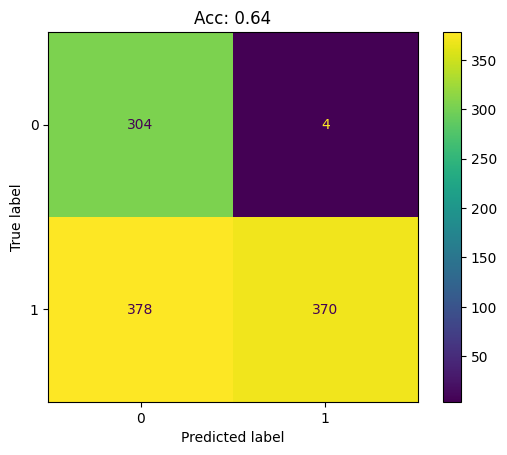

In [135]:
disp = ConfusionMatrixDisplay(np.array([[tn, fp],[fn, tp]]))
disp.plot(cmap='viridis')
plt.title(f"Acc: {(tp+tn)/(tp+tn+fp+fn):.2f}")

0.6382575757575758

In [102]:
#goal - to find accuracy for both the algo, greedy filter and simple filter
csv_folder = "../attendance_by_date"

pairs = []
for date in os.listdir(csv_folder):
    # print(date)
    date_path = os.path.join(csv_folder, date)
    try:
        pred = glob(f"{date_path}/*greedy*")[0]
        gt = glob(f"{date_path}/gt*")[0]
    except:
        # print(f"Missing file in: {date}")
        pass
        continue
    # print(pred, gt)
    pairs.append([gt, pred])
# print(pairs)

In [116]:
frr_thres = []
far_thres = []
thresh_list = []
for thresh in range(0, 100, 10):
    thresh = thresh/100
    thresh_list.append(thresh)
    
    print(thresh)
    scores = []
    for gt_file, att_file in pairs:
        # print(f"GT: {gt_file}  <->  Attendance: {att_file}")
        df = get_metrics(gt_file, att_file, thresh=thresh, all_rolls=all_rolls)
        scores.append(df)
    # get_avg_scores(scores)
    tn = sum([s['cm'][0][0] for s in scores]) # shouldnt be there, arent there
    fp = sum([s['cm'][0][1] for s in scores]) # should not be there, are there
    fn = sum([s['cm'][1][0] for s in scores]) # not there, not there
    tp = sum([s['cm'][1][1] for s in scores]) # there, there
    tn, fp, tp, fn

    print("fp:", fp)
    frr = fn / (tp+fn)
    far = fp / (tn+fp)
    print("=",far, frr)
    frr_thres.append(frr)
    far_thres.append(far)



0.0
fp: 0
= 0.0 1.0
0.1
fp: 0
= 0.0 0.8502673796791443
0.2


c:\Users\verma\miniconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\verma\miniconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\verma\miniconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\verma\miniconda3\en

fp: 3
= 0.00974025974025974 0.5053475935828877
0.3
fp: 39
= 0.1266233766233766 0.29545454545454547
0.4
fp: 123
= 0.39935064935064934 0.1590909090909091
0.5
fp: 202
= 0.6558441558441559 0.08288770053475936
0.6
fp: 228
= 0.7402597402597403 0.05213903743315508
0.7
fp: 230
= 0.7467532467532467 0.0427807486631016
0.8
fp: 230
= 0.7467532467532467 0.0427807486631016
0.9
fp: 230
= 0.7467532467532467 0.0427807486631016


In [105]:
import matplotlib.pyplot as plt

In [119]:
import numpy as np

def compute_eer(far_list, frr_list, thresholds):
    far_arr = np.array(far_list)
    frr_arr = np.array(frr_list)
    thresholds = np.array(thresholds)

    # Find index where FAR and FRR are closest
    idx = np.argmin(np.abs(far_arr - frr_arr))

    eer = (far_arr[idx] + frr_arr[idx]) / 2
    eer_threshold = thresholds[idx]

    return eer, eer_threshold

thresholds = thresh_list

eer, eer_thresh = compute_eer(far_thres, frr_thres, thresholds)
print(f"EER: {eer:.3f} at threshold: {eer_thresh}")

EER: 0.211 at threshold: 0.3


Text(0.5, 1.0, 'FRR FAR Curve: EER 0.21 at 0.3')

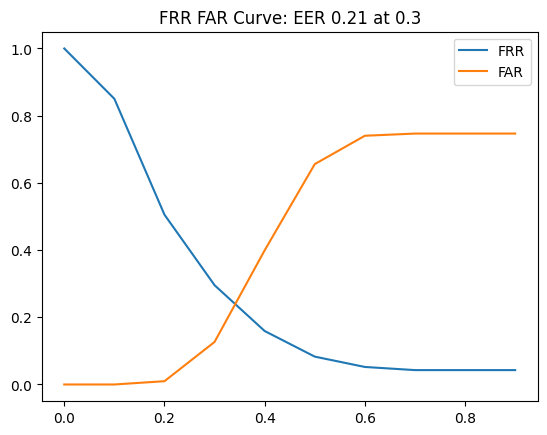

In [122]:
plt.plot(thresh_list, frr_thres, label="FRR")
plt.plot(thresh_list, far_thres, label="FAR")
plt.legend()
plt.title(f"FRR FAR Curve: EER {eer:.2f} at {eer_thresh}")